In [1]:
################################################################################################
#                                      ACTIVITY 01: DATA HANDLING                              #
################################################################################################
# 1. Carregue a base de dados Titanic do Kaggle (train) no Jupyter em um DataFrame             #
# 2. Carregue, explore e visualize os dados através de gráficos                                #
# 3. Remova as colunas que não agregam valor e justifique                                      #
# 4. Trate valores nulos por coluna ou remova as linhas com dados nulos Ex.: Valores           #
#    nulos da coluna 'Age', baseado em 'Pclass' e 'Sex'                                        #
# 5. Substitua colunas literais por valores numéricos                                          #
# 6. Normalize os valores numéricos que não são binários                                       #
# 7. Remova as colunas literais restantes                                                      #
################################################################################################

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
################################################
# 1. Carregue a base de dados Titanic do       #
#    Kaggle (train) no Jupyter em um DataFrame #
################################################

In [4]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [5]:
#################################################################
# 2. Carregue, explore e visualize os dados através de gráficos #
#################################################################

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_train.describe()
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


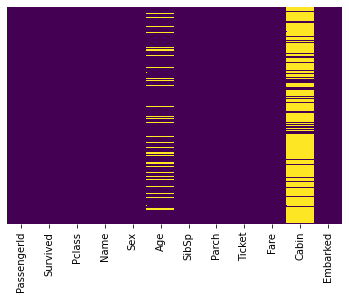

In [9]:
# Visualize null fields

sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

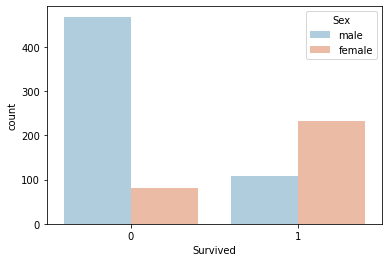

In [10]:
# Explore correlation Sex Pclass and Survived

sns.countplot(x='Survived', hue='Sex', data=df_train, palette='RdBu_r')

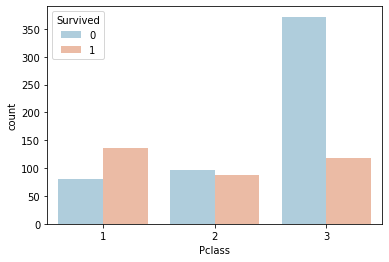

In [11]:
# Explore correlation between Pclass and Survived

sns.countplot(x='Pclass', hue='Survived', data=df_train, palette='RdBu_r')

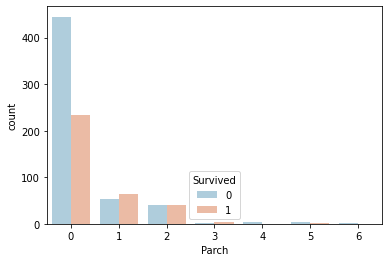

In [12]:
# Explore correlation between Parch and Survived

sns.countplot(x='Parch', hue='Survived', data=df_train, palette='RdBu_r')

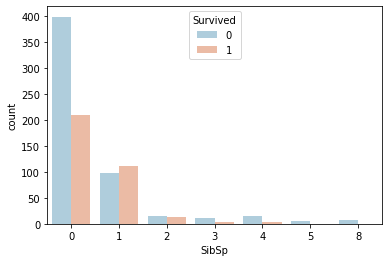

In [13]:
# Explore correlation between SibSp and Survived

sns.countplot(x='SibSp', hue='Survived', data=df_train, palette='RdBu_r')

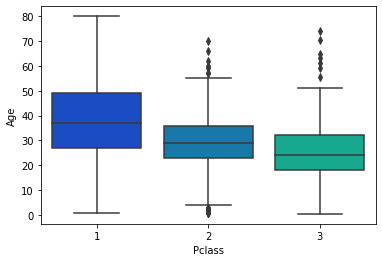

In [14]:
sns.boxplot(x='Pclass', y='Age', data=df_train, palette='winter')

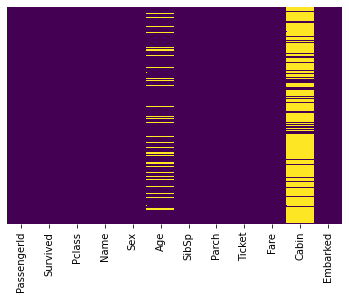

In [15]:
# Visualize null fields

sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [16]:
###########################################################
# 3. Remova as colunas que não agregam valor e justifique #
###########################################################

In [17]:
################################################################
# 'Name' : valor agregado de 'Name' pode  ser alcançado        #
#          com 'Pclass', 'Fare', entre outros.                 #      
#                                                              #
# 'Cabin': muitos valores nulos e valor agregado de 'Cabin'    #
#          pode ser alcançado com 'Pclass', 'Fare', entre      #
#          outros.                                             #
#                                                              #
# 'PassengerId' e 'Ticket': identificadores únicos             #
################################################################

cols     = ['Name','Ticket','Cabin', 'PassengerId']
df_train = df_train.drop(cols, axis=1)
df_test  = df_test.drop(cols, axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [18]:
##########################################
# 4. Trate valores nulos por coluna      #
#    ou remova as linhas com dados nulos #
#                                        #
#    Ex.: Valores nulos da coluna 'Age', #
#         baseado em 'Pclass' e 'Sex'    #
##########################################

In [19]:
# Pegar valores únicos de cada coluna p/ usar no tratamento dos dados.

pclass_vals = df_train.Pclass.unique().tolist()
sex_vals = df_train.Sex.unique().tolist()

In [20]:
# 'Age': preencher valores nulos baseado em 'Pclass' e 'Sex'.

for sex in sex_vals:
    for pclass in pclass_vals:
        median_age = df_train.loc[(df_train.Sex == sex) & (df_train.Pclass == pclass) & (~df_train.Age.isnull())].Age.median()
        df_train.loc[(df_train.Sex == sex) & (df_train.Pclass == pclass) & (df_train.Age.isnull()), ["Age"]] = median_age
        df_test.loc[(df_test.Sex == sex) & (df_test.Pclass == pclass) & (df_test.Age.isnull()), ["Age"]] = median_age


In [21]:
# 'Embarked': preencher valores nulos baseado na moda.

embarked_mode = df_train.Embarked.dropna().mode()[0]
df_train.Embarked = df_train.Embarked.fillna(embarked_mode)
df_test.Embarked = df_test.Embarked.fillna(embarked_mode)

In [22]:
#######################################################
# 5. Substitua colunas literais por valores numéricos #
#######################################################

In [23]:
# Transforma os valores de Pclass, Sex e Embarked em numéricos (Slide 27).

dummies = []
literal_cols = ['Pclass','Sex','Embarked']

for col in literal_cols:
    dummies.append(pd.get_dummies(df_train[col], drop_first=True))

In [24]:
titanic_dummies = pd.concat(dummies, axis=1)
titanic_dummies.head()

,2,3,male,Q,S
0,0,1,1,0,1
1,0,0,0,0,0
2,0,1,0,0,1
3,0,0,0,0,1
4,0,1,1,0,1


In [25]:
df_train = pd.concat((df_train, titanic_dummies), axis=1)
df_test = pd.concat((df_test, titanic_dummies), axis=1)

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,2,3,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,0,1,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,1,1,0,1


In [26]:
##########################################################
# 6. Normalize os valores numéricos que não são binários #
##########################################################

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([
    ("scaling", StandardScaler(), ['Age', 'Fare'])
])

ct.fit(df_train)
train_ss = ct.transform(df_train)
# test_ss = ct.transform(df_test)

print(train_ss)

[[-0.53489116 -0.50244517]
 [ 0.66839176  0.78684529]
 [-0.23407043 -0.48885426]
 ...
 [-0.57249375 -0.17626324]
 [-0.23407043 -0.04438104]
 [ 0.21716066 -0.49237783]]


In [28]:
df_train_ss = pd.DataFrame(train_ss)
# df_test_ss = pd.DataFrame(test_ss)

In [29]:
df_train_ss = pd.concat((df_train, df_train_ss), axis=1)
df_train_ss = df_train_ss.rename({0: 'AgeSS', 1: 'FareSS'}, axis = 1)
df_train_ss.head()

# df_test_ss = pd.concat((df_test, df_test_ss), axis=1)
# df_test_ss = df_test_ss.rename({0: 'AgeSS', 1: 'FareSS'}, axis = 1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,2,3,male,Q,S,AgeSS,FareSS
0,0,3,male,22.0,1,0,7.2500,S,0,1,1,0,1,-0.534891,-0.502445
1,1,1,female,38.0,1,0,71.2833,C,0,0,0,0,0,0.668392,0.786845
2,1,3,female,26.0,0,0,7.9250,S,0,1,0,0,1,-0.234070,-0.488854
3,1,1,female,35.0,1,0,53.1000,S,0,0,0,0,1,0.442776,0.420730
4,0,3,male,35.0,0,0,8.0500,S,0,1,1,0,1,0.442776,-0.486337


In [30]:
###########################################
# 7. Remova as colunas literais restantes #
###########################################

In [31]:
drop_cols = ['Pclass','Sex','Embarked', 'Age', 'Fare']

df_train_ss = df_train_ss.drop(drop_cols, axis=1)
# df_test_ss = df_test_ss.drop(drop_cols, axis=1)

df_train_ss.head()

,Survived,SibSp,Parch,2,3,male,Q,S,AgeSS,FareSS
0,0,1,0,0,1,1,0,1,-0.534891,-0.502445
1,1,1,0,0,0,0,0,0,0.668392,0.786845
2,1,0,0,0,1,0,0,1,-0.234070,-0.488854
3,1,1,0,0,0,0,0,1,0.442776,0.420730
4,0,0,0,0,1,1,0,1,0.442776,-0.486337


In [32]:
##################################################################################################
#                                    ACTIVITY 02: KNN EXPERIMENTS                                #
##################################################################################################
# 1. Volte ao notebook da prática anterior e divida a base em treinamento e testes               #
# 2. Crie um classificador kNN escolhendo um k que você deseje                                   #
# 3. Treine com todas as características numéricas 'escalonadas'                                 #
# 4. Faça a predição na base de testes                                                           #
# 5. Avalie a qualidade do seu modelo de acordo com a quantidade de acertos e                    #
# erros da predição quando comparada ao valor real - dê este valor como um percentual            #
# 6. Descubra o melhor valor de 'k' executando várias vezes os passos 3 a 6 com                  #
# iferentes valores possíveis de 'k' e optando pela melhor avaliação.                            #
##################################################################################################

In [33]:
def bestNeighborsKnn(X_train, X_test, y_train, y_test):
    max_accuracy = 0
    best_neighbors = 0
    for i in range(1,50):
        classifier = KNeighborsClassifier(n_neighbors=i)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
        if max_accuracy < accuracy:
            max_accuracy = accuracy
            best_neighbors = i
    return best_neighbors

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X = df_train_ss[['SibSp', 'Parch', 2, 3, 'male', 'Q', 'S', 'AgeSS', 'FareSS']]
y = df_train_ss['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
best_neighbors = bestNeighborsKnn(X_train, X_test, y_train, y_test)
print("Neighbors:", best_neighbors)
knn = KNeighborsClassifier(n_neighbors=best_neighbors)
knn.fit(X_train, y_train)

Neighbors: 16


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

In [36]:
y_pred = knn.predict(X_test)
accuracy_score(y_true=y_test, y_pred=y_pred)

0.8212290502793296

In [37]:
knn.score(X_train, y_train)

0.8202247191011236

In [38]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[96  9]
 [23 51]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.85      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



In [39]:
##################################################################################################
#                                    ACTIVITY 03: K-Fold Cross-Validation                        #
##################################################################################################
# 1. Volte a prática do Titanic                                                                  #
# 2. Treine novamente um classificador kNN, porém utilizando validação cruzada                   #
# com 5 folds;                                                                                   #
# 3. Descubra o melhor valor de k executando várias vezes a validação cruzada                    #
# com diferentes valores possíveis.                                                              #
# 4. Avalie o seu modelo de acordo com as métricas abordadas:                                    #
#     Matriz Confusão, Precisão, Cobertura, Acurácia e F1-Score                                  #
##################################################################################################

In [44]:
def bestNeighborsCv(X_train, y_train):
    max_accuracy = 0
    best_neighbors = 0
    for i in range(1,50):
        knn_cv = KNeighborsClassifier(n_neighbors = i)
        scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
        accuracy = scores.mean()
        if max_accuracy < accuracy:
            max_accuracy = accuracy
            best_neighbors = i
    return best_neighbors

In [45]:
best_neighbors_cv = bestNeighborsCv(X_train, y_train)
knn_cv = KNeighborsClassifier(n_neighbors = best_neighbors_cv)
knn_cv.fit(X_train, y_train)
y_pred = knn_cv.predict(X_test)
scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
print("Neighbors:", best_neighbors_cv)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Neighbors: 19
[0.81118881 0.82517483 0.84507042 0.76056338 0.82394366]
Accuracy: 0.81 (+/- 0.06)


In [42]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       105
           1       0.85      0.68      0.75        74

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



# Confusion Matrix

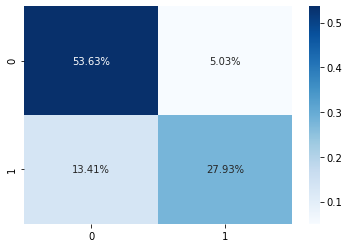

In [43]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')